In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

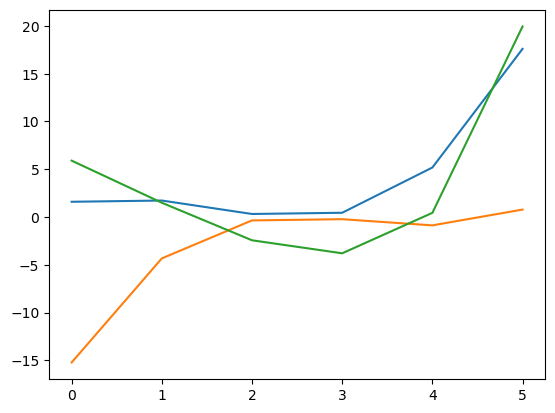

In [2]:
labels = np.linspace(-3,3,1000)
corr_labels = np.tile(labels, (6, 1)).T
# print(corr_labels[:,0])
x = np.linspace(-2,2,6)
corr_data = np.zeros((1000,6))
for i in range(len(corr_data)):
    corr_data[i] = x**3 - corr_labels[i,0]*x**2
plt.plot(corr_data[100])
plt.plot(corr_data[800])
corr_data += 5*np.random.uniform(-1,1, size=corr_data.shape)
plt.plot(corr_data[100])
# plt.plot(corr_data[800])

In [3]:
label_table = np.loadtxt("CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt", skiprows=1, usecols=range(1, 7))

d = np.load("../wgplus_data.npz")
# dictionary
axes = ['x', 'y', 'z']
r = d['r']
wgplusses = {axis: d[axis] for axis in axes}
d = np.load("../wgg_data.npz")
wgg = d['wgg']

# Example: Access the 250th row, 4th column of the 'x' axis
print(label_table.shape)
print(wgplusses['x'].shape)
corr_data = np.array(wgplusses['x'])
corr_data = np.append(corr_data, np.append(wgplusses['y'],wgplusses['z'],axis=0),axis=0)
corr_labels = np.repeat(label_table, 3, axis=0)
print(corr_data.shape, corr_labels.shape)

(1000, 6)
(1000, 6)
(3000, 6) (3000, 6)


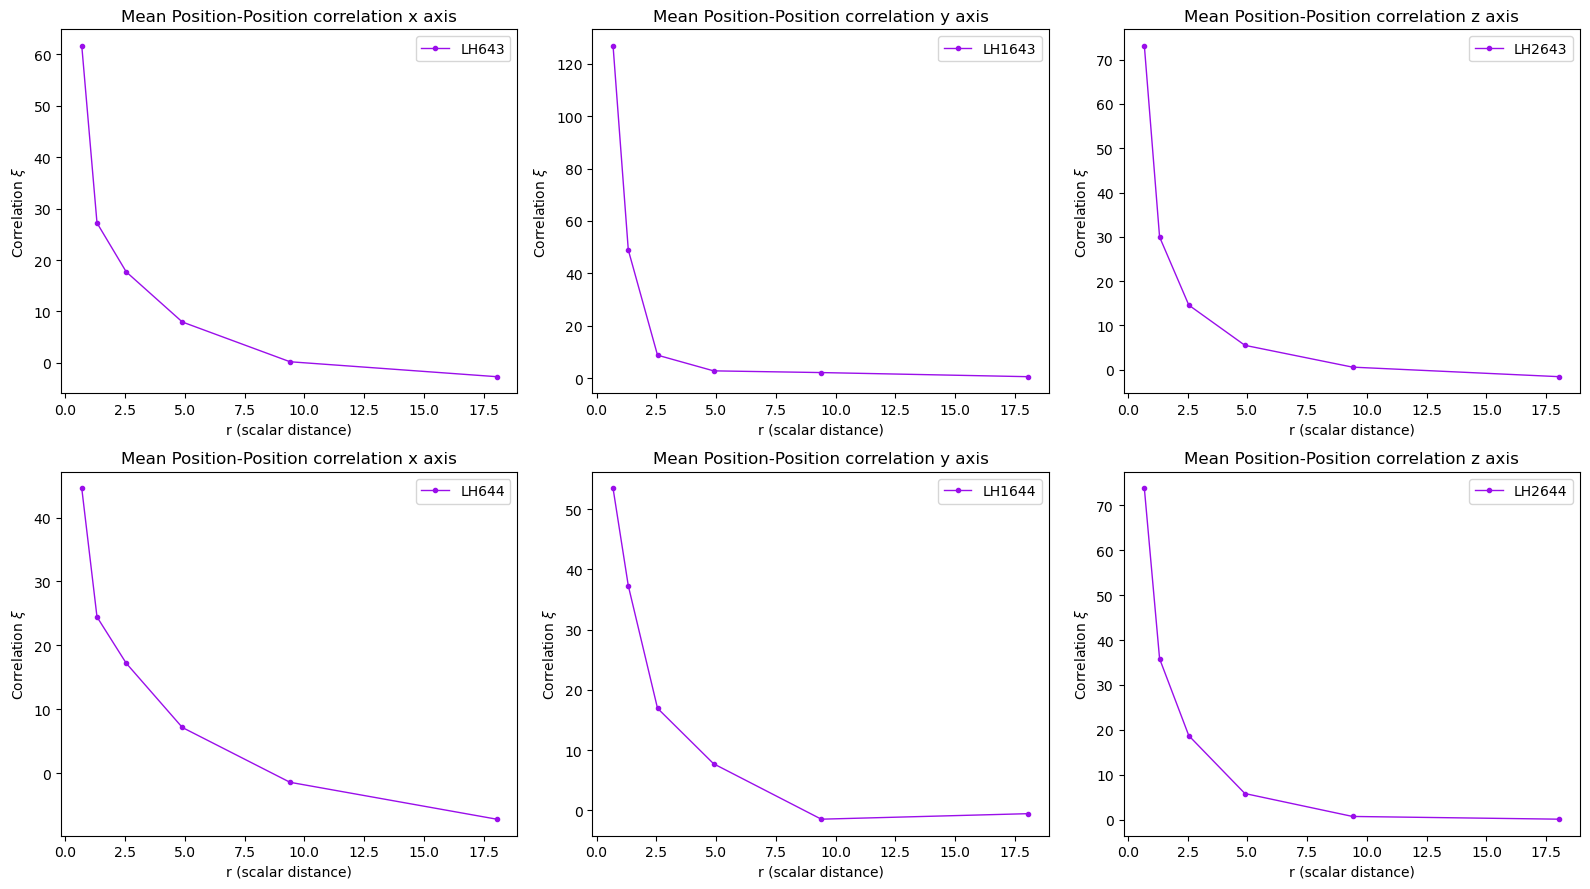

In [199]:
# print(wgg.shape)
# corr_data = wgg
fig, ax = plt.subplots(2, 3,figsize=(16, 9))
for i in range(2):
    for j in range(3):
        ax[i,j].errorbar(r,wgg[i+643+1000*j],color='xkcd:violet',lw=1,
             label=f'LH{i+643+1000*j}', fmt = '.-')
        #ax[i,j].set_ylim([-0.035,0.01])
        ax[i,j].set_xlabel(r'r (scalar distance)')
        ax[i,j].set_ylabel(r'Correlation $\xi$')
        ax[i,j].set_title(f'Mean Position-Position correlation {axes[j]} axis')
        ax[i,j].legend()
plt.tight_layout()


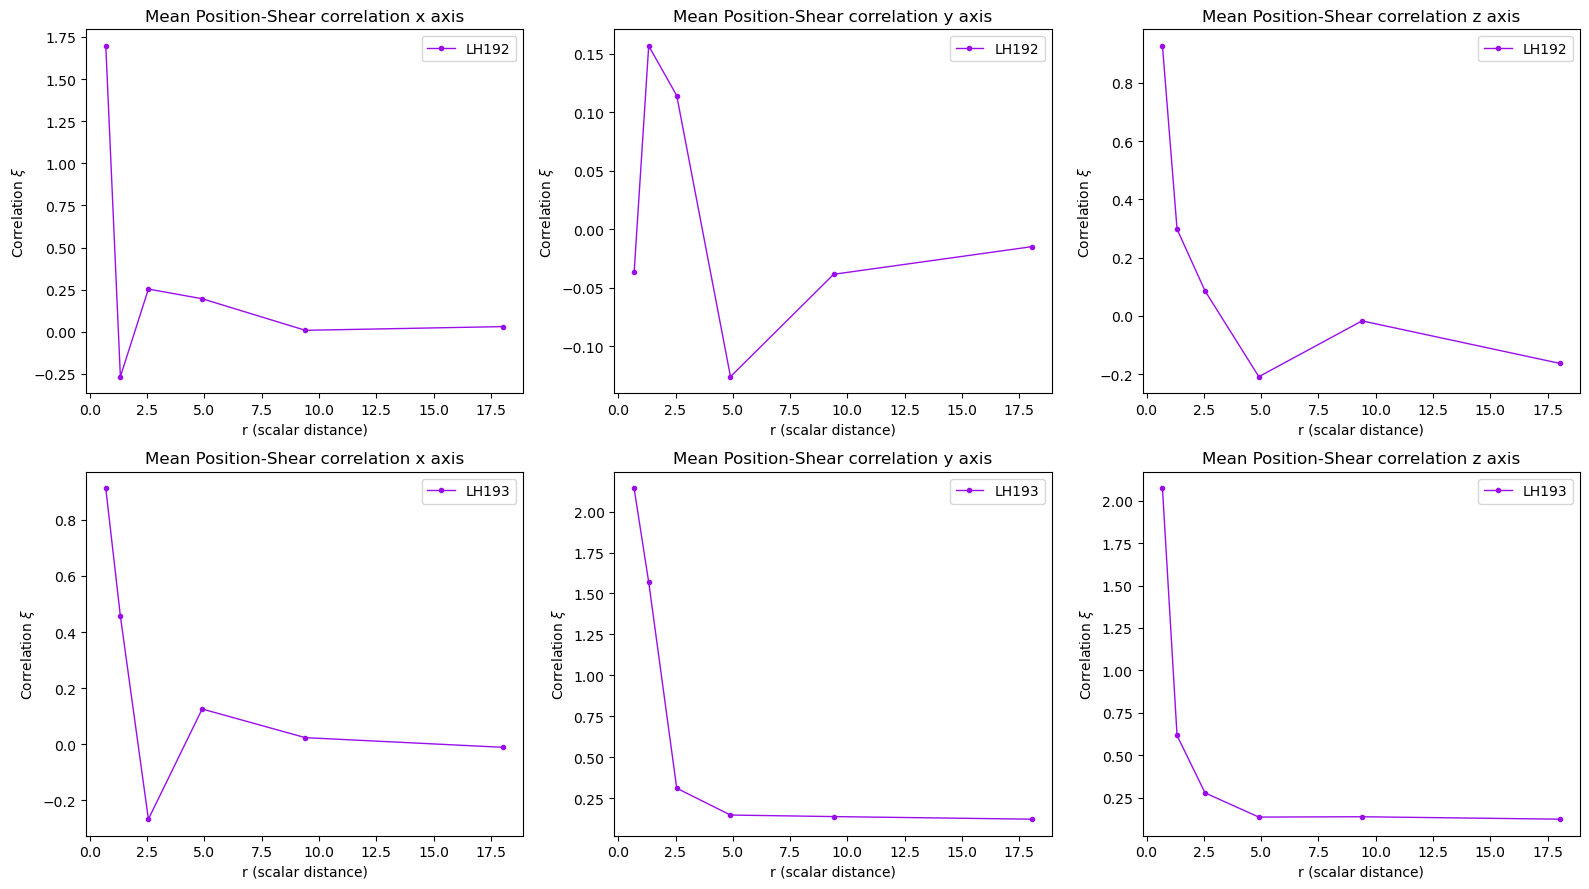

In [235]:
fig, ax = plt.subplots(2, 3,figsize=(16, 9))
for i in range(2):
    for j in range(3):
        ax[i,j].errorbar(r,wgplusses[axes[j]][i+184],color='xkcd:violet',lw=1,
             label=f'LH{i+192}', fmt = '.-')
        #ax[i,j].set_ylim([-0.035,0.01])
        ax[i,j].set_xlabel(r'r (scalar distance)')
        ax[i,j].set_ylabel(r'Correlation $\xi$')
        ax[i,j].set_title(f'Mean Position-Shear correlation {axes[j]} axis')
        ax[i,j].legend()
plt.tight_layout()

In [4]:
# Get the number of samples (dimension along the first axis)
num_samples = corr_data.shape[0]
# Generate a random permutation of indices
random_indices = np.random.permutation(num_samples)
# Shuffle both arrays using the same permutation
corr_data = corr_data[random_indices]
corr_labels = corr_labels[random_indices]

In [6]:
mean_labels = np.mean(corr_labels,axis=0)
std_labels = np.std(corr_labels,axis=0)
print(mean_labels)
print(std_labels)
renorm_labels = (corr_labels-mean_labels) / (std_labels)  #+ 0.5 # mean of 0.5, std of 0.2

mean_corrs = np.mean(corr_data,axis=0)
std_corrs = np.std(corr_data,axis=0)
print(mean_corrs)
print(std_corrs)
renorm_corrs = (corr_data-mean_corrs)/(std_corrs)  # mean of 0, std of 0.2

[0.3        0.8        1.35252612 1.35252612 1.08202118 1.08202118]
[0.11547    0.11547    1.02214894 1.02214894 0.42632871 0.42632871]
[1.84196419 0.58107442 0.20204337 0.10429877 0.05308822 0.01370463]
[2.84132872 0.92559248 0.32423855 0.17477564 0.10118084 0.09779046]


Text(0, 0.5, 'Frequency')

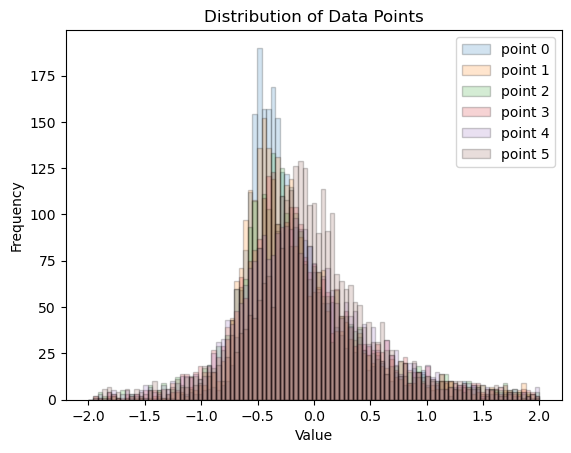

In [7]:
for i in [0,1,2,3,4,5]:
    plt.hist(renorm_corrs[:,i], bins=np.linspace(-2,2,100), edgecolor='black',alpha=0.2, label=f'point {i}')
plt.legend()
plt.title(f'Distribution of Data Points')
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

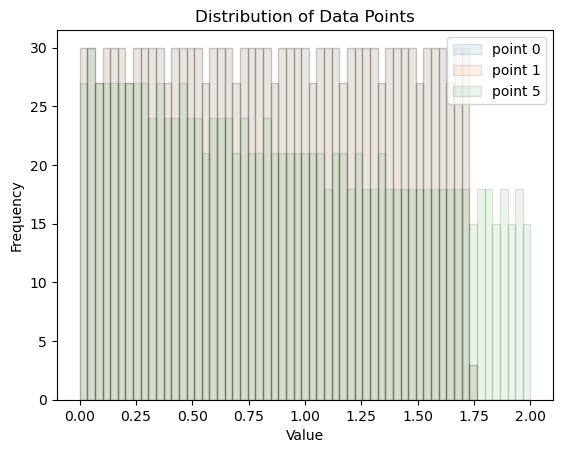

In [6]:
for i in [0,1,5]:
    plt.hist(renorm_labels[:,i], bins=np.linspace(-0,2,60), edgecolor='black',alpha=0.1, label=f'point {i}')
plt.legend()
plt.title(f'Distribution of Data Points')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [9]:
train_data, test_data, train_label, test_label = train_test_split(renorm_corrs, renorm_labels, test_size = 0.1, random_state = None, shuffle=True)
train_data, val_data, train_label, val_label = train_test_split(train_data, train_label, test_size = 0.05, random_state = None)
print(train_data.shape, train_label.shape)
print(test_data.shape, test_label.shape)
print(val_data.shape, val_label.shape)

(2565, 6) (2565, 6)
(300, 6) (300, 6)
(135, 6) (135, 6)


#### Build Model

In [224]:
model = keras.models.Sequential()
#model.add(normalizer)
model.add(tf.keras.layers.Dense(50, input_shape=(6,), activation="relu"))

# model.add(tf.keras.layers.BatchNormalization())  # Normalization 1
model.add(tf.keras.layers.Dense(50, activation='relu'))

# model.add(tf.keras.layers.BatchNormalization())  # Normalization 1
model.add(tf.keras.layers.Dense(32, activation='relu'))

# model.add(tf.keras.layers.BatchNormalization())  # Normalization 1
model.add(tf.keras.layers.Dense(8, activation='relu'))


# model.add(tf.keras.layers.BatchNormalization())  # Normalization 3
model.add(tf.keras.layers.Dense(1, activation='tanh'))
#model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4))
model.build()
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 50)                350       
                                                                 
 dense_106 (Dense)           (None, 50)                2550      
                                                                 
 dense_107 (Dense)           (None, 32)                1632      
                                                                 
 dense_108 (Dense)           (None, 8)                 264       
                                                                 
 dense_109 (Dense)           (None, 1)                 9         
                                                                 
Total params: 4805 (18.77 KB)
Trainable params: 4805 (18.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [225]:
param=0
pre_test_predict=model.predict(test_data, verbose=1)
history=model.fit(train_data,train_label[:,param],epochs=20,batch_size=32,verbose=1,validation_data=(val_data,val_label[:,param]))

5/5 [==============================] - 0s 601us/step
Epoch 1/20
85/85 [==============================] - 0s 814us/step - loss: 1.0111 - val_loss: 0.9643
Epoch 2/20
85/85 [==============================] - 0s 476us/step - loss: 1.0040 - val_loss: 0.9675
Epoch 3/20
85/85 [==============================] - 0s 460us/step - loss: 0.9996 - val_loss: 0.9685
Epoch 4/20
85/85 [==============================] - 0s 500us/step - loss: 0.9970 - val_loss: 0.9627
Epoch 5/20
85/85 [==============================] - 0s 525us/step - loss: 0.9936 - val_loss: 0.9771
Epoch 6/20
85/85 [==============================] - 0s 543us/step - loss: 0.9903 - val_loss: 0.9711
Epoch 7/20
85/85 [==============================] - 0s 585us/step - loss: 0.9893 - val_loss: 0.9835
Epoch 8/20
85/85 [==============================] - 0s 637us/step - loss: 0.9831 - val_loss: 0.9866
Epoch 9/20
85/85 [==============================] - 0s 906us/step - loss: 0.9803 - val_loss: 0.9882
Epoch 10/20
85/85 [============================

End validation loss is: 1.0141313076019287


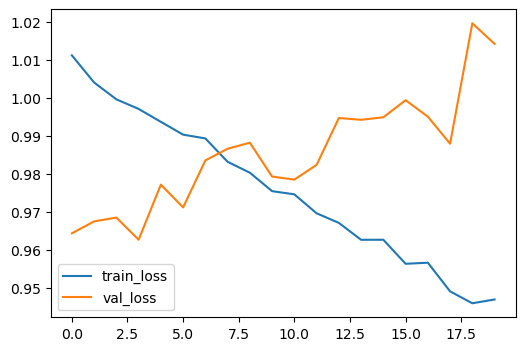

In [226]:
print("End validation loss is:", history.history['val_loss'][-1])
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(history.history['loss'], label='train_loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.set_title = 'Loss of the model'
ax.xlabel = 'Time (Epochs)'
ax.ylabel = 'Loss'
ax.legend()

5/5 [==============================] - 0s 717us/step


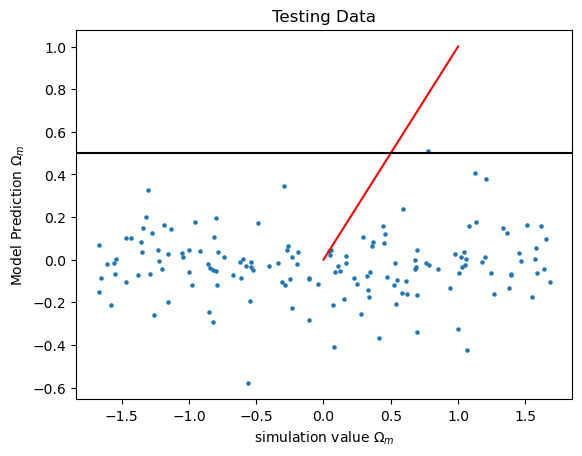

In [228]:
simpars = ['\Omega_m','\sigma_8','A_{SN1}','A_{SN2}','A_{AGN1}','A_{AGN2}']
lims = [[0.1,0.5],[0.6,1.0],np.log([0.25,4.0]),np.log([0.5,2.0]),np.log([0.5,2.0]),np.log([0.5,2.0])]
test_predict=model.predict(test_data, verbose=1)
plt.plot([0,1],[0,1],c='r')
plt.scatter(test_label[:,param], test_predict,s=5)
# plt.ylim([np.min(test_label[:,param]),np.max(test_label[:,param])])
# plt.xlim([np.min(test_label[:,param]),np.max(test_label[:,param])])
plt.ylabel(f'Model Prediction ${simpars[param]}$')
plt.xlabel(f'simulation value ${simpars[param]}$')
plt.title('Testing Data')
plt.axhline(0.5,c='k')

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np


In [47]:
param=0
# Convert the data to PyTorch tensors
X_train = torch.tensor(train_data, dtype=torch.float32)
y_train = torch.tensor(train_label[:, param], dtype=torch.float32)

X_val = torch.tensor(val_data, dtype=torch.float32)
y_val = torch.tensor(val_label[:, param], dtype=torch.float32)

X_test = torch.tensor(test_data, dtype=torch.float32)
y_test = torch.tensor(test_label[:, param], dtype=torch.float32)


In [48]:
class LargerCorrelationModel(nn.Module):
    def __init__(self):
        super(LargerCorrelationModel, self).__init__()
        self.fc1 = nn.Linear(6, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 1)
        
        # Dropout layers to reduce overfitting
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(torch.relu(self.fc2(x)))
        x = torch.relu(self.fc3(x))
        x = self.dropout(torch.relu(self.fc4(x)))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x


In [53]:
model = LargerCorrelationModel()
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.0005)


In [54]:
num_epochs = 200
best_val_loss = float('inf')
patience, patience_counter = 100, 0

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs.flatten(), y_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs.flatten(), y_val)
    
    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Save the best model
    else:
        patience_counter += 1
    
    if patience_counter > patience:
        print(f"Early stopping on epoch {epoch+1}")
        break

    # Print losses every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/200], Loss: 0.9994, Val Loss: 1.0215
Epoch [20/200], Loss: 0.9977, Val Loss: 1.0086
Epoch [30/200], Loss: 0.9952, Val Loss: 1.0136
Epoch [40/200], Loss: 0.9918, Val Loss: 1.0154
Epoch [50/200], Loss: 0.9889, Val Loss: 1.0199
Epoch [60/200], Loss: 0.9839, Val Loss: 1.0310
Epoch [70/200], Loss: 0.9767, Val Loss: 1.0455
Epoch [80/200], Loss: 0.9731, Val Loss: 1.0548
Epoch [90/200], Loss: 0.9615, Val Loss: 1.0463
Epoch [100/200], Loss: 0.9593, Val Loss: 1.0387
Epoch [110/200], Loss: 0.9543, Val Loss: 1.0379
Epoch [120/200], Loss: 0.9379, Val Loss: 1.0383
Early stopping on epoch 121


In [55]:
# Load the best model based on validation loss
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs.flatten(), y_test)
    print(f'Test Loss: {test_loss.item():.4f}')


Test Loss: 1.0089


/var/folders/2k/4lvm79j14sg5_v8dqx8tly7h0000gn/T/ipykernel_46740/982689432.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.p

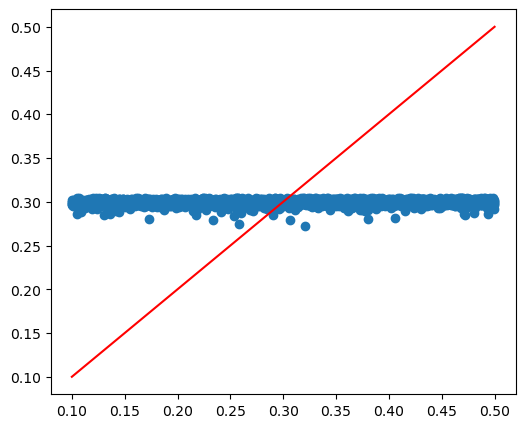

In [57]:
simpars = ['\Omega_m','\sigma_8','A_{SN1}','A_{SN2}','A_{AGN1}','A_{AGN2}']
lims = [[0.1,0.5],[0.6,1.0],np.log([0.25,4.0]),np.log([0.5,2.0]),np.log([0.5,2.0]),np.log([0.5,2.0])]


model_guess = model(X_test).flatten().detach().numpy() * std_labels[param] + mean_labels[param]
correct_labels = y_test * std_labels[param] + mean_labels[param]

plt.figure(figsize=(6,5))
plt.plot(lims[param],lims[param],c='r')
plt.scatter(correct_labels, model_guess)